# FIND HISTORICAL NYC DATA

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.7143,
	"longitude": -74.006,
	"start_date": "1970-01-01",
	"end_date": "2025-04-03",
	"hourly": "temperature_2m",
	"wind_speed_unit": "kn",
	"precipitation_unit": "inch"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m

nyc_hourly_dataframe = pd.DataFrame(data = hourly_data)
nyc_hourly_dataframe.to_csv('./apilist/utils/nyc_weather_data.csv')
print(nyc_hourly_dataframe)

Coordinates 40.738136291503906°N -74.04254150390625°E
Elevation 51.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                            date  temperature_2m
0      1970-01-01 00:00:00+00:00       -2.816500
1      1970-01-01 01:00:00+00:00       -3.616500
2      1970-01-01 02:00:00+00:00       -4.366500
3      1970-01-01 03:00:00+00:00       -4.966500
4      1970-01-01 04:00:00+00:00       -5.616500
...                          ...             ...
484363 2025-04-03 19:00:00+00:00       22.122499
484364 2025-04-03 20:00:00+00:00       21.472500
484365 2025-04-03 21:00:00+00:00       21.672499
484366 2025-04-03 22:00:00+00:00       21.622499
484367 2025-04-03 23:00:00+00:00       21.022499

[484368 rows x 2 columns]


In [55]:
# hourly_dataframe.describe()
# hourly_dataframe.dtypes
# hourly_dataframe.shape
null_counts = nyc_hourly_dataframe.isnull().sum()
print(null_counts)

date              0
temperature_2m    0
dtype: int64


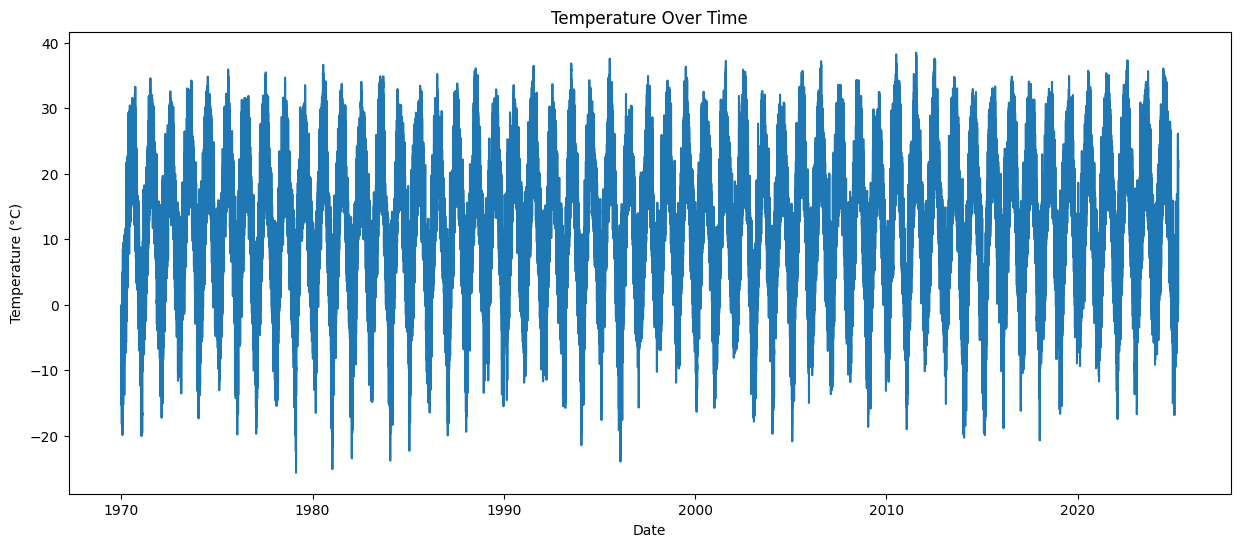

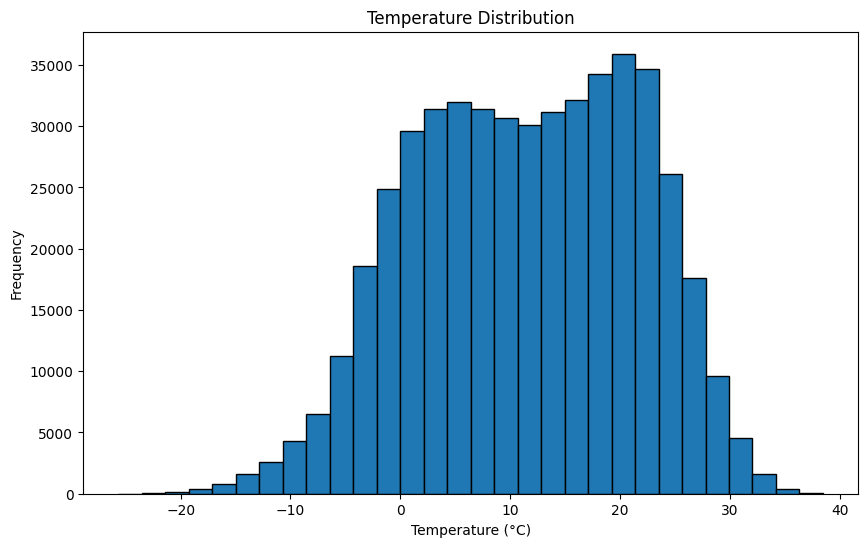

In [56]:
import matplotlib.pyplot as plt

nyc_hourly_dataframe.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(nyc_hourly_dataframe['temperature_2m'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot a histogram of temperature values
plt.figure(figsize=(10, 6))
plt.hist(nyc_hourly_dataframe['temperature_2m'], bins=30, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

                           temperature_2m
date                                     
1970-01-01 00:00:00+00:00         -2.8165
1970-01-01 01:00:00+00:00         -3.6165
1970-01-01 02:00:00+00:00         -4.3665
1970-01-01 03:00:00+00:00         -4.9665
1970-01-01 04:00:00+00:00         -5.6165
Original DataFrame columns: Index(['temperature_2m'], dtype='object')
DataFrame columns after renaming: Index(['ds', 'y'], dtype='object')


17:33:49 - cmdstanpy - INFO - Chain [1] start processing
17:36:09 - cmdstanpy - INFO - Chain [1] done processing


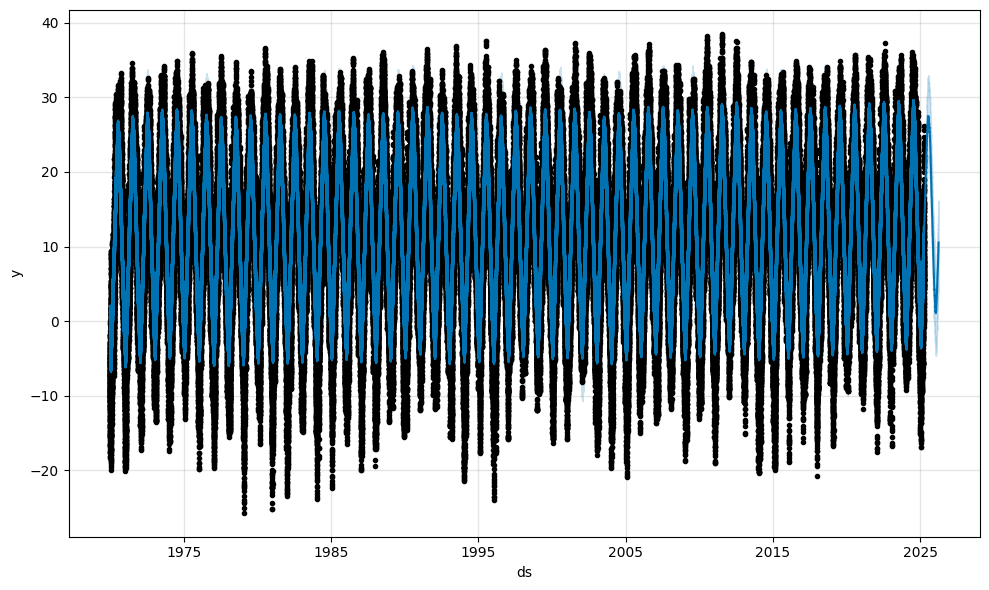

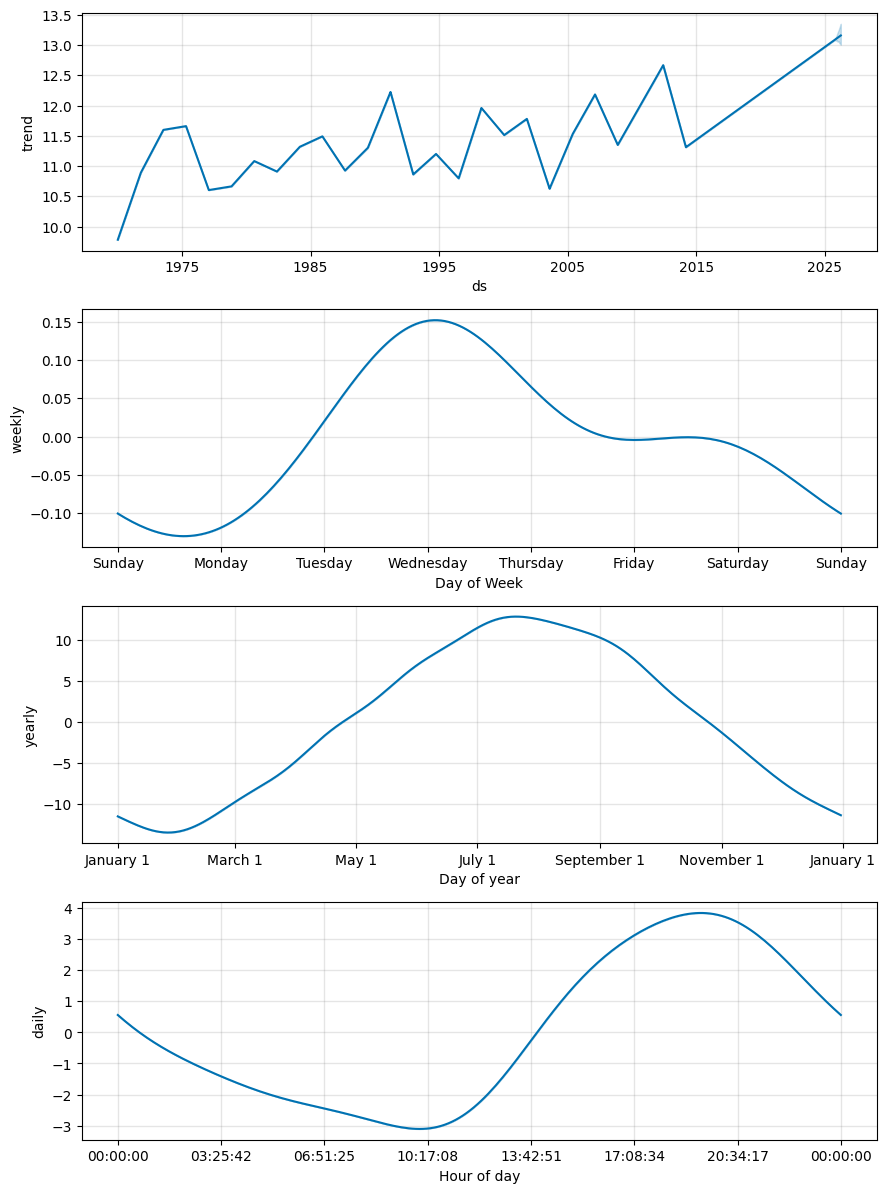

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00,9.782698,-6.211577,4.255074,9.782698,9.782698,-10.818133,-10.818133,-10.818133,0.558706,...,0.065127,0.065127,0.065127,-11.441966,-11.441966,-11.441966,0.0,0.0,0.0,-1.035435
1,1970-01-01 01:00:00,9.782769,-7.353504,3.384180,9.782769,9.782769,-11.580716,-11.580716,-11.580716,-0.193594,...,0.059612,0.059612,0.059612,-11.446735,-11.446735,-11.446735,0.0,0.0,0.0,-1.797947
2,1970-01-01 02:00:00,9.782840,-7.359641,3.577365,9.782840,9.782840,-12.164168,-12.164168,-12.164168,-0.766879,...,0.054214,0.054214,0.054214,-11.451503,-11.451503,-11.451503,0.0,0.0,0.0,-2.381328
3,1970-01-01 03:00:00,9.782911,-7.931953,2.543978,9.782911,9.782911,-12.641070,-12.641070,-12.641070,-1.233757,...,0.048958,0.048958,0.048958,-11.456270,-11.456270,-11.456270,0.0,0.0,0.0,-2.858159
4,1970-01-01 04:00:00,9.782982,-8.785730,1.664459,9.782982,9.782982,-13.059871,-13.059871,-13.059871,-1.642704,...,0.043870,0.043870,0.043870,-11.461037,-11.461037,-11.461037,0.0,0.0,0.0,-3.276889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484728,2026-03-30 23:00:00,13.157498,4.164694,15.103248,13.007586,13.346346,-3.455400,-3.455400,-3.455400,1.493006,...,0.012455,0.012455,0.012455,-4.960860,-4.960860,-4.960860,0.0,0.0,0.0,9.702098
484729,2026-03-31 23:00:00,13.157918,4.757123,15.575248,13.007294,13.347639,-3.110701,-3.110701,-3.110701,1.493006,...,0.150205,0.150205,0.150205,-4.753912,-4.753912,-4.753912,0.0,0.0,0.0,10.047217
484730,2026-04-01 23:00:00,13.158337,4.946926,15.137182,13.007001,13.349022,-2.979619,-2.979619,-2.979619,1.493006,...,0.070727,0.070727,0.070727,-4.543351,-4.543351,-4.543351,0.0,0.0,0.0,10.178719
484731,2026-04-02 23:00:00,13.158757,4.536389,16.152378,13.006709,13.350579,-2.840916,-2.840916,-2.840916,1.493006,...,-0.004285,-0.004285,-0.004285,-4.329636,-4.329636,-4.329636,0.0,0.0,0.0,10.317841


In [57]:
import matplotlib.pyplot as plt
from prophet import Prophet

print(nyc_hourly_dataframe.head())
print("Original DataFrame columns:", nyc_hourly_dataframe.columns)

# Rename columns to match the Prophet's requirements
nyc_df = nyc_hourly_dataframe.reset_index().rename({'date': 'ds', 'temperature_2m': 'y'}, axis=1)
# credit: https://stackoverflow.com/a/73170360/13355500
nyc_df['ds'] = pd.to_datetime(nyc_df['ds']).dt.tz_convert(None)  # Ensure 'ds' is in datetime format

# Check the column names after renaming
print("DataFrame columns after renaming:", nyc_df.columns)
# Model fit
nyc_m = Prophet()
nyc_m.fit(nyc_df)

# Predict
future = nyc_m.make_future_dataframe(periods=365)
forecast = nyc_m.predict(future)

# Plot results
fig1 = nyc_m.plot(forecast)
fig2 = nyc_m.plot_components(forecast)
plt.show()
forecast

In [ ]:
from prophet.serialize import model_to_json, model_from_json

with open('./apilist/utils/nyc_model.json', 'w') as fout:
    fout.write(model_to_json(nyc_m))

with open('./apilist/utils/nyc_model.json', 'r') as fin:
    nyc_m = model_from_json(fin.read())

# FIND HISTORICAL LA DATA

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 34.0522,
	"longitude": -118.2437,
	"start_date": "1970-01-01",
	"end_date": "2025-04-03",
	"hourly": "temperature_2m",
	"wind_speed_unit": "kn",
	"precipitation_unit": "inch"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m

la_hourly_dataframe = pd.DataFrame(data = hourly_data)
la_hourly_dataframe.to_csv('./apilist/utils/la_weather_data.csv')
print(la_hourly_dataframe)

Coordinates 34.05975341796875°N -118.23750305175781°E
Elevation 91.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                            date  temperature_2m
0      1970-01-01 00:00:00+00:00       17.351000
1      1970-01-01 01:00:00+00:00       14.901000
2      1970-01-01 02:00:00+00:00       13.451000
3      1970-01-01 03:00:00+00:00       12.651000
4      1970-01-01 04:00:00+00:00       10.651000
...                          ...             ...
484363 2025-04-03 19:00:00+00:00       17.677000
484364 2025-04-03 20:00:00+00:00       19.427000
484365 2025-04-03 21:00:00+00:00       20.876999
484366 2025-04-03 22:00:00+00:00       19.526999
484367 2025-04-03 23:00:00+00:00       17.077000

[484368 rows x 2 columns]


In [60]:
null_counts = la_hourly_dataframe.isnull().sum()
print(null_counts)

date              0
temperature_2m    0
dtype: int64


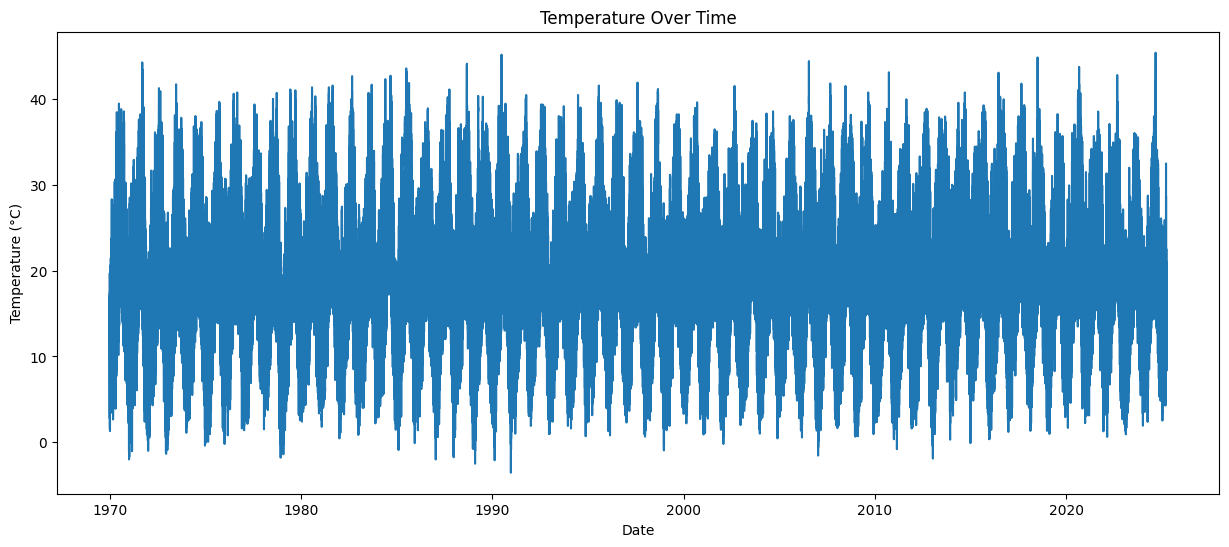

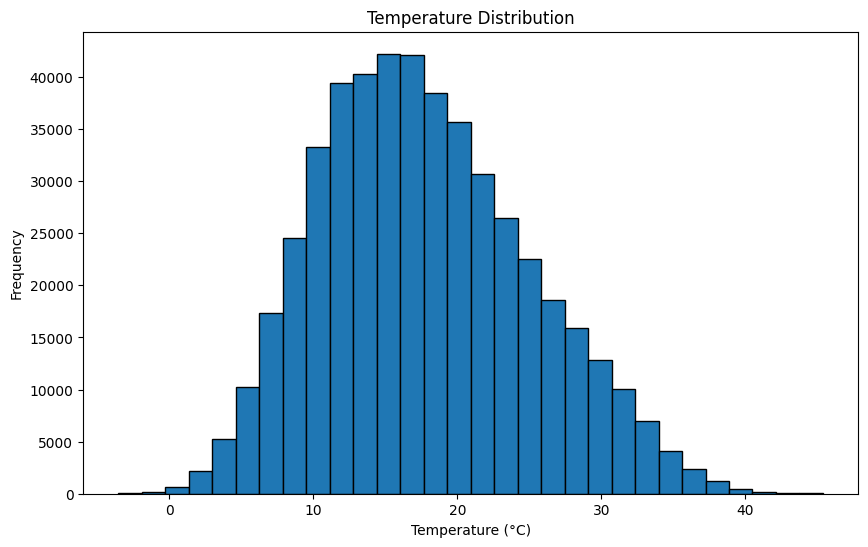

In [61]:
import matplotlib.pyplot as plt

la_hourly_dataframe.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(la_hourly_dataframe['temperature_2m'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot a histogram of temperature values
plt.figure(figsize=(10, 6))
plt.hist(la_hourly_dataframe['temperature_2m'], bins=30, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

                           temperature_2m
date                                     
1970-01-01 00:00:00+00:00          17.351
1970-01-01 01:00:00+00:00          14.901
1970-01-01 02:00:00+00:00          13.451
1970-01-01 03:00:00+00:00          12.651
1970-01-01 04:00:00+00:00          10.651
Original DataFrame columns: Index(['temperature_2m'], dtype='object')
DataFrame columns after renaming: Index(['ds', 'y'], dtype='object')


17:39:21 - cmdstanpy - INFO - Chain [1] start processing
17:42:08 - cmdstanpy - INFO - Chain [1] done processing


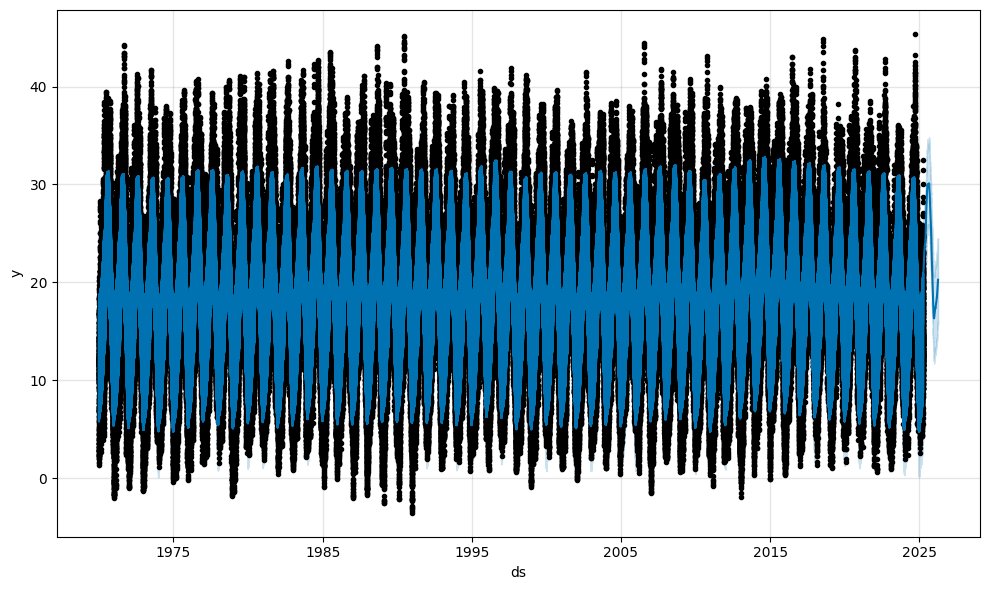

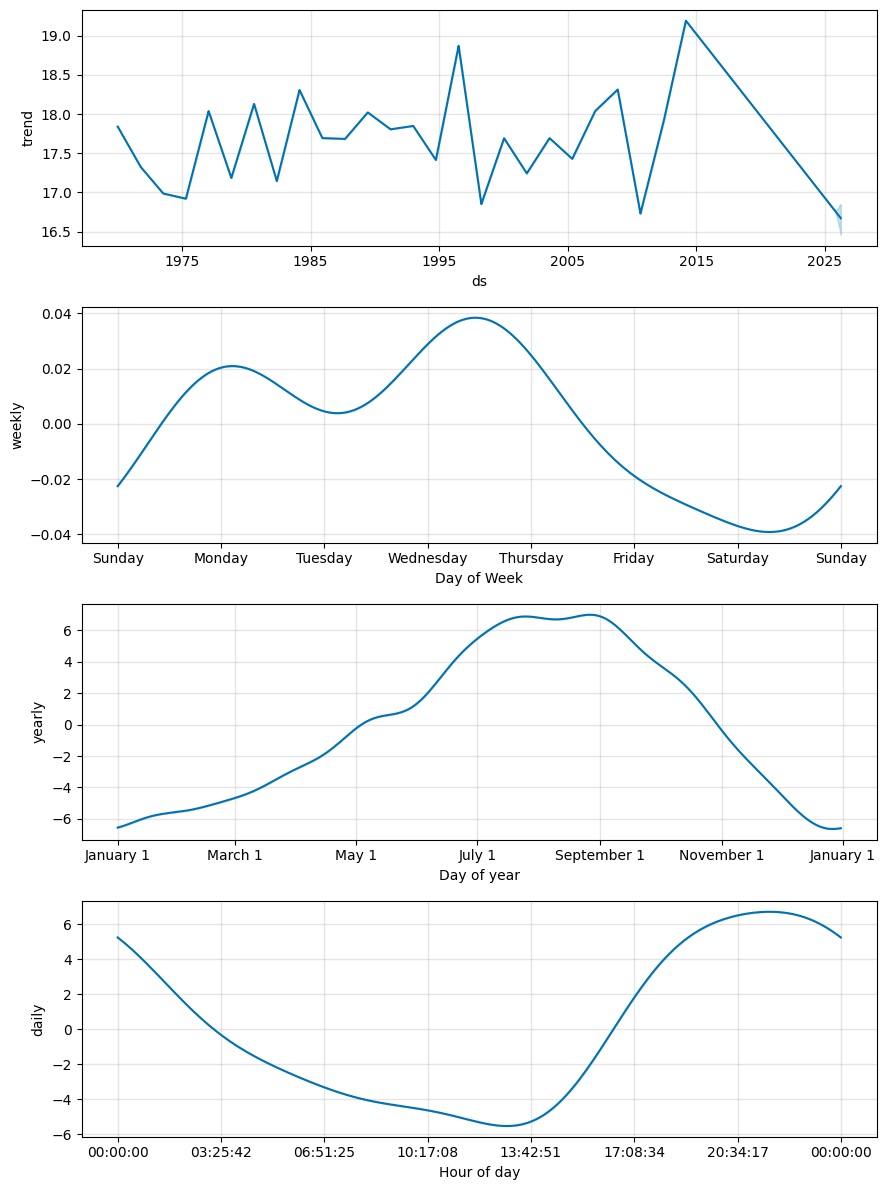

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00,17.839923,12.426344,20.986454,17.839923,17.839923,-1.288134,-1.288134,-1.288134,5.251846,...,0.024874,0.024874,0.024874,-6.564855,-6.564855,-6.564855,0.0,0.0,0.0,16.551789
1,1970-01-01 01:00:00,17.839890,10.581644,19.131154,17.839890,17.839890,-2.850586,-2.850586,-2.850586,3.690056,...,0.022950,0.022950,0.022950,-6.563593,-6.563593,-6.563593,0.0,0.0,0.0,14.989304
2,1970-01-01 02:00:00,17.839857,8.554848,17.377945,17.839857,17.839857,-4.638926,-4.638926,-4.638926,1.902440,...,0.020956,0.020956,0.020956,-6.562322,-6.562322,-6.562322,0.0,0.0,0.0,13.200932
3,1970-01-01 03:00:00,17.839824,6.769608,15.946173,17.839824,17.839824,-6.272826,-6.272826,-6.272826,0.269312,...,0.018905,0.018905,0.018905,-6.561044,-6.561044,-6.561044,0.0,0.0,0.0,11.566998
4,1970-01-01 04:00:00,17.839792,6.247648,14.745670,17.839792,17.839792,-7.546208,-7.546208,-7.546208,-1.003261,...,0.016811,0.016811,0.016811,-6.559758,-6.559758,-6.559758,0.0,0.0,0.0,10.293584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484728,2026-03-30 23:00:00,16.673594,15.429323,24.466362,16.467134,16.851199,3.388131,3.388131,3.388131,6.274368,...,0.004973,0.004973,0.004973,-2.891210,-2.891210,-2.891210,0.0,0.0,0.0,20.061725
484729,2026-03-31 23:00:00,16.673021,15.802526,24.499121,16.464905,16.851379,3.471679,3.471679,3.471679,6.274368,...,0.027199,0.027199,0.027199,-2.829888,-2.829888,-2.829888,0.0,0.0,0.0,20.144701
484730,2026-04-01 23:00:00,16.672449,16.111592,24.387764,16.462677,16.851490,3.531681,3.531681,3.531681,6.274368,...,0.026715,0.026715,0.026715,-2.769402,-2.769402,-2.769402,0.0,0.0,0.0,20.204131
484731,2026-04-02 23:00:00,16.671877,15.785487,24.512093,16.460669,16.851579,3.547143,3.547143,3.547143,6.274368,...,-0.017714,-0.017714,-0.017714,-2.709512,-2.709512,-2.709512,0.0,0.0,0.0,20.219020


In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet

print(la_hourly_dataframe.head())
print("Original DataFrame columns:", la_hourly_dataframe.columns)

# Rename columns to match the Prophet's requirements
la_df = la_hourly_dataframe.reset_index().rename({'date': 'ds', 'temperature_2m': 'y'}, axis=1)
# credit: https://stackoverflow.com/a/73170360/13355500
la_df['ds'] = pd.to_datetime(la_df['ds']).dt.tz_convert(None)  # Ensure 'ds' is in datetime format

# Check the column names after renaming
print("DataFrame columns after renaming:", la_df.columns)
# Model fit
la_m = Prophet()
la_m.fit(la_df)

# Predict
future = la_m.make_future_dataframe(periods=365)
forecast = la_m.predict(future)

# Plot results
fig1 = la_m.plot(forecast)
fig2 = la_m.plot_components(forecast)
plt.show()
forecast

In [ ]:
from prophet.serialize import model_to_json, model_from_json

with open('./apilist/utils/la_model.json', 'w') as fout:
    fout.write(model_to_json(la_m))

with open('./apilist/utils/la_model.json', 'r') as fin:
    la_m = model_from_json(fin.read())

: 